# Bayesian Hyperparameter

## Read Boston Housing dataset and define dataset

In [1]:
#import required libaries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np

# import customized helper functions
import helper_functions

In [2]:
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('boston_housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

FileNotFoundError: [Errno 2] No such file or directory: 'boston_housing.csv'

In [3]:
# LSTAT: % lower status of the population
X = data['LSTAT']
X = np.array(X)

# MEDV: Median value of owner-occupied homes in $1000's
y = data['MEDV']

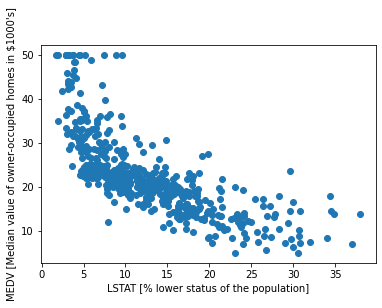

In [4]:
plt.scatter(X, y)
plt.xlabel("LSTAT [% lower status of the population]")
plt.ylabel("MEDV [Median value of owner-occupied homes in $1000's]")
plt.show()

## Create svm regression model and plot

Cross Validation Score for models with a polynomial degree of 2: MSE = 37.06
Cross Validation Score for models with a polynomial degree of 2: MSE = 32.19
Cross Validation Score for models with a polynomial degree of 2: MSE = 31.64


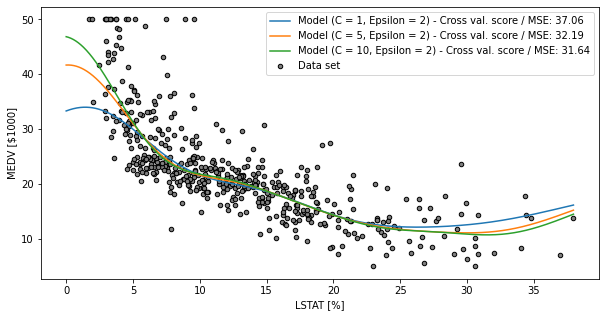

<Figure size 432x288 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt

# test data set
epsilon = [2, 2, 2]
C = [1, 5, 10]


plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
#plt.setp(ax)
    
for i in range(len(C)):
    X_test, y_test, scores = helper_functions.cross_validation_svm_regression(X, y, C[i], epsilon[i])
    plt.plot(X_test, y_test, label="Model (C = " + str(C[i]) + ", Epsilon = " + str(epsilon[i]) + ") - Cross val. score / MSE: " + str(round(-scores.mean(), 2)))
    
plt.scatter(X, y, edgecolor='black', color='grey', s=20, label="Data set")
plt.xlabel("LSTAT [%]")
plt.ylabel("MEDV [$1000]")

plt.legend(loc="best")
#plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
#    degrees[i], -scores.mean(), scores.std()))
plt.show()

plt.savefig("polynomial_regression_example.png", dpi=150)

## Define the hyperparameter space and carry out a grid search

* epsilon = 1-20
* C = 1-10

ValueError: min() arg is an empty sequence

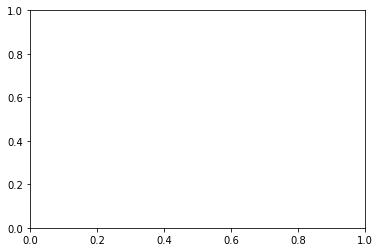

In [6]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

ngridx = 100
ngridy = 200
npts = 200

# define the hyperparameter space
hyperparameter_space = 3

if hyperparameter_space == 1:
    epsilon_min = 1
    epsilon_max = 20
    C_min = 1
    C_max =20
    step = 1
    
if hyperparameter_space == 2:
    epsilon_min = 1
    epsilon_max =8
    C_min = 1
    C_max =20
    step = 1
    
if hyperparameter_space == 3:
    epsilon_min = 1
    epsilon_max =12
    C_min = 20
    C_max =20
    step = 0.1
    
epsilon = list(np.arange(epsilon_min,epsilon_max,step))
C = list(np.arange(C_min,C_max,step))

#calculate cv_score for each hyperparameter combination
cv_scores, c_settings, epsilon_settings = helper_functions.grid_search(epsilon, C, X, y)

#define plot dimensions
x_plot = c_settings
y_plot = epsilon_settings
z_plot = cv_scores

#define figure
fig, ax1 = plt.subplots(1)

# -----------------------
# Interpolation on a grid
# -----------------------
# A contour plot of irregularly spaced data coordinates
# via interpolation on a grid.

# Create grid values first.
xi = np.linspace(min(x_plot)-1, max(x_plot)+1, ngridx)
yi = np.linspace(min(y_plot)-1, max(y_plot)+1, ngridy)

# Perform linear interpolation of the data (x,y)
# on a grid defined by (xi,yi)
triang = tri.Triangulation(x_plot, y_plot)
interpolator = tri.LinearTriInterpolator(triang, z_plot)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

# Note that scipy.interpolate provides means to interpolate data on a grid
# as well. The following would be an alternative to the four lines above:
ax1.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax1)
ax1.plot(x_plot, y_plot, 'ko', ms=3)
ax1.set(xlim=(min(x_plot), max(x_plot)), ylim=(min(y_plot), max(y_plot)))
#ax1.set_title('grid and contour (%d points, %d grid points)' %
#              (npts, ngridx * ngridy))
ax1.set_xlabel('C')
ax1.set_ylabel('Epsilon')

#plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
cv_scores

# 2-dimensional Hyperparamter Optimization

In [ ]:
import pandas as pd
grid_search_results = pd.DataFrame(
    {'cv_scores': cv_scores,
     'c_setting': c_settings,
     'epsilon_setting': epsilon_settings
    })

grid_search_results = grid_search_results[grid_search_results.c_setting == 19]
grid_search_results

In [ ]:
grid_search_results.c_setting.to_list()

In [ ]:
plt.plot(grid_search_results.epsilon_setting, grid_search_results.cv_scores)

# Mean Squared Error (MSE)

\operatorname{MSE}=\frac{1}{n}\sum_{i=1}^n(Y_i-\hat{Y_i})^2

## Grid Search: with Cross Validation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, 1, 1)
    #plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    print("Cross Validation Score for models with a polynomial degree of " + str(degrees[i]) + ": MSE = " + str(round(-scores.mean(),2)))

    X_test = np.linspace(0, 1, 1000)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model (Polynomial Degree = " + str(degrees[i]) + ")")
    
#plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
#plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
#    degrees[i], -scores.mean(), scores.std()))
plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

cv_scores = []
degrees = []

plt.figure(figsize=(14, 5))
for degree in range(1,30,1):
    ax = plt.subplot(1, 1, 1)
    #plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    #print("Cross Validation Score for models with a polynomial degree of " + str(degrees[i]) + ": MSE = " + str(round(-scores.mean(),2)))

    cv_scores.append(-scores.mean())
    degrees.append(degree)

    
plt.plot(degrees, cv_scores)
plt.xlabel("x")
plt.ylabel("y")
#plt.xlim((0, 1))
#plt.ylim((-2, 2))
#plt.legend(loc="best")
#plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
#    degrees[i], -scores.mean(), scores.std()))
plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

#def true_fun(X):
#    return np.cos(1.5 * np.pi * X)


#np.random.seed(0)

#n_samples = 30

#X = np.sort(np.random.rand(n_samples))
#y = true_fun(X) + np.random.randn(n_samples) * 0.1

cv_scores = []
degrees = []

plt.figure(figsize=(14, 5))
for eps in range(0,50000,100):
    ax = plt.subplot(1, 1, 1)
    #plt.setp(ax, xticks=(), yticks=())

    regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.0001*eps))

    # Evaluate the models using crossvalidation
    scores = cross_val_score(regr, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    #print("Cross Validation Score for models with a polynomial degree of " + str(degrees[i]) + ": MSE = " + str(round(-scores.mean(),2)))

    cv_scores.append(-scores.mean())
    degrees.append(0.0001*eps)

    
plt.plot(degrees, cv_scores)
plt.xlabel("x")
plt.ylabel("y")
#plt.xlim((0, 1))
#plt.ylim((-2, 2))
#plt.legend(loc="best")
#plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
#    degrees[i], -scores.mean(), scores.std()))
plt.show()

In [ ]:
cv_scores[40]

# Gaussian Process to accelerate the process

## Helper function for creating the graph

# Sample Dataset

In [ ]:
rng = np.random.RandomState(4)
X_train = rng.uniform(0, 5, 10).reshape(-1, 1)
y_train = np.sin((X_train[:, 0] - 2.5) ** 2)
n_samples = 5

# Applying the dataset

In [ ]:
import numpy as np
X_train = np.array([degrees[1], degrees[50], degrees[99]])
X_train = X_train.reshape(3, -1)
y_train = [cv_scores[1],cv_scores[40], cv_scores[99]]
#y_train = y_train.reshape(3, -1)
print(len(X_train))
print(len(y_train))

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
gpr.fit(X_train, y_train)

In [ ]:
%matplotlib
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 8))

# plot prior
helper_functions.plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[0])
axs[0].set_title("Samples from prior distribution")

# plot posterior
gpr.fit(X_train, y_train)
helper_functions.plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X_train[:, 0], y_train, color="red", zorder=10, label="Observations")
axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
axs[1].set_title("Samples from posterior distribution")

fig.suptitle("Radial Basis Function kernel", fontsize=18)
plt.tight_layout()

In [ ]:
y_train